# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [3]:
# Check for GPU
!nvidia-smi

Tue Oct  1 15:31:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"

device


2.4.1


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

Smartphones, self driving cars and security cameras

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Over fitting is where the model closes matches the training data but perfoms much more poorly in the test data and wider applications against the real world.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

* Model Simplification: Starting with a high-capacity model and then simplifying it through techniques like feature selection or pruning can help prevent overfitting.
* Regularization: Techniques like L1 and L2 regularization, dropout, and weight decay can help reduce the model’s capacity to fit the training data too closely.
* Data Augmentation: Increasing the size of the training dataset through data augmentation can provide more opportunities for the model to learn generalizable patterns, reducing overfitting.



## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

Done

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [2]:
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

ModuleNotFoundError: No module named '_lzma'

In [5]:
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None)


test_data = datasets.FashionMNIST(
    root='data',
    train='False',
    download=True,
    transform=ToTensor())

100%|██████████| 26421880/26421880 [00:02<00:00, 10300558.07it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 212463.22it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 2062189.55it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14569687.58it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

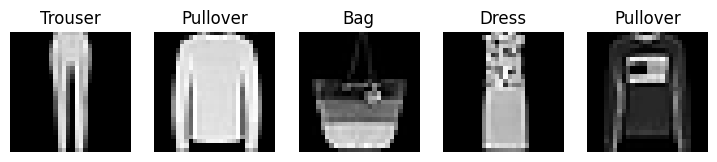

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 9))

rows, cols = 1, 5

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(train_data.classes[label])
  plt.axis(False)



## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [7]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader



(<torch.utils.data.dataloader.DataLoader at 0x7a3f08492320>,
 <torch.utils.data.dataloader.DataLoader at 0x7a3f08491cc0>)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [8]:
from torch import nn

# Create the CNN network

class FashionMNISTModelV2(nn.Module):
  """Model architecture that replicates the TinyVGG
  model from CNN explainer website"""

  def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x):

    x= self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x





In [9]:
torch.manual_seed(42)

class_names = train_data.classes

model_exercise = FashionMNISTModelV2(input_shape=1,
                              output_shape=len(class_names),
                              hidden_units=10).to(device)

model_exercise



FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [10]:
# Importing the helper functions

import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/abinghamwalker/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
      f.write(request.content)



In [11]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_exercise.parameters(),
                            lr=0.1)

In [12]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [13]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. Calculuate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [14]:
torch.manual_seed(42)
from helper_functions import print_train_time
from tqdm.auto import tqdm

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 5

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  train_step(model=model_exercise,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_exercise,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

In [15]:
torch.manual_seed(42)
from helper_functions import print_train_time
from tqdm.auto import tqdm

# Measure time
from timeit import default_timer as timer
train_time_start_on_cpu = timer()

# Set epochs
epochs = 5

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  train_step(model=model_exercise,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device="cpu")
  test_step(model=model_exercise,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device="cpu")

train_time_end_on_cpu = timer()
total_train_time_model_1_cpu = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device="cpu")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 0.59518 | Train acc: 78.38%
Test loss: 0.37069 | Test acc: 86.78%

Epoch: 1
----------
Train loss: 0.36536 | Train acc: 86.90%
Test loss: 0.31934 | Test acc: 88.35%

Epoch: 2
----------
Train loss: 0.32588 | Train acc: 88.13%
Test loss: 0.29783 | Test acc: 89.55%

Epoch: 3
----------
Train loss: 0.30489 | Train acc: 88.92%
Test loss: 0.28467 | Test acc: 89.57%

Epoch: 4
----------
Train loss: 0.28981 | Train acc: 89.56%
Test loss: 0.27038 | Test acc: 90.22%


Train time on cpu: 453.828 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediction to the target label.

In [16]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [17]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

In [18]:
# Make predictions
pred_probs = make_predictions(model=model_exercise,
                              data=test_samples)

pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([7, 3, 9, 8, 1, 0, 0, 8, 8])

In [19]:
test_labels, pred_classes

([7, 3, 9, 8, 1, 0, 0, 8, 8], tensor([7, 3, 9, 8, 1, 0, 0, 8, 8]))

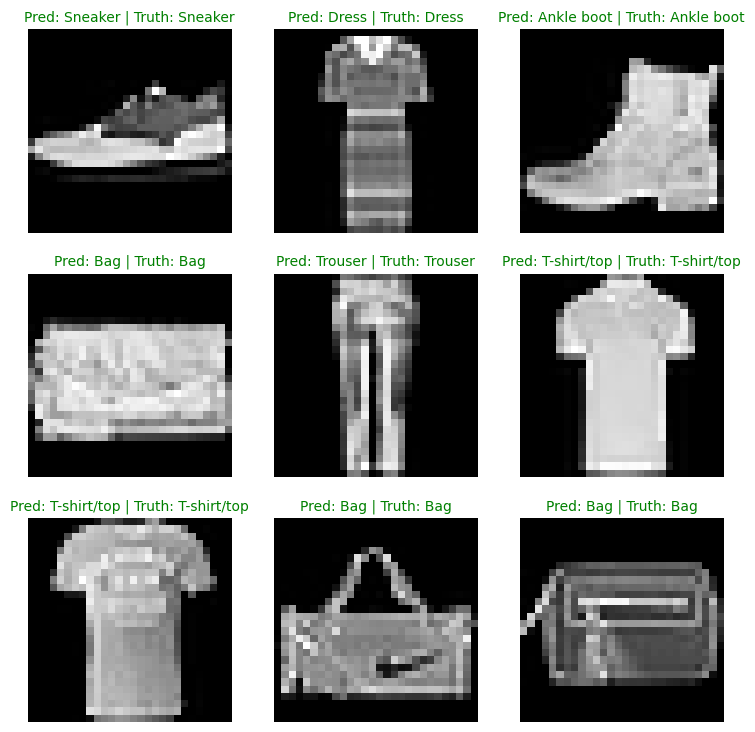

In [40]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [26]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_exercise.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_exercise(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/1875 [00:00<?, ?it/s]

In [27]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 20.1 MB/s eta 0:00:00
mlxtend version: 0.23.1


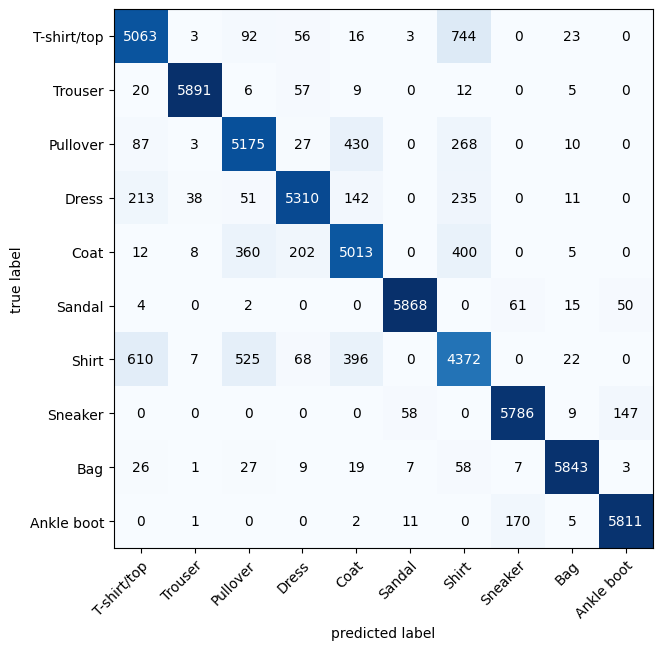

In [29]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [36]:
torch.manual_seed(42)

random_tensor = torch.randn(size=(1,3,64,64))
sample_random_tensor = random_tensor[0]

In [37]:
test_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

test_layer(sample_random_tensor)

tensor([[[ 0.8749,  0.0150, -0.4290,  ..., -1.1880,  0.1210,  0.0502],
         [-0.1600,  1.5533,  1.3823,  ...,  0.0863, -0.6430,  1.2283],
         [ 1.3474,  0.5078,  0.2019,  ...,  0.3903, -0.2170,  0.0527],
         ...,
         [-0.7715,  0.0873, -0.4201,  ...,  0.5970,  0.1311,  0.1298],
         [-0.5241,  0.1333,  0.4383,  ..., -0.7087,  0.3955,  0.7658],
         [ 0.4166, -0.4016, -1.2844,  ...,  0.0160,  1.0234,  0.3984]],

        [[ 0.1967,  1.3474,  0.6714,  ..., -0.0843,  0.1066,  0.2328],
         [ 0.2710,  0.5023,  0.1052,  ...,  0.8877,  0.5606, -0.1174],
         [ 1.1818,  0.1024,  0.5121,  ..., -0.3384,  0.3195, -0.4044],
         ...,
         [ 0.1932,  0.6239, -0.5603,  ...,  0.5374,  0.9277,  0.1038],
         [-0.0818, -0.5295, -0.4567,  ...,  0.1020,  0.3115,  0.2878],
         [ 0.2423,  0.5618, -0.2143,  ..., -0.5292, -1.0010, -0.1536]],

        [[ 0.4104, -0.5223,  0.2356,  ...,  0.7879, -0.6773,  0.5915],
         [-1.0417, -0.1082, -0.3600,  ...,  0

In [39]:
torch.manual_seed(42)

sample_random_tensor_2 = random_tensor[0]

test_layer_2 = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=4,
                       stride=1,
                       padding=0)

test_layer_2(random_tensor)



tensor([[[[-0.2584,  0.6455,  0.3741,  ...,  1.2278, -0.6301,  1.7600],
          [ 0.6211,  0.1582,  0.0875,  ...,  0.1401,  0.2669,  0.3648],
          [-0.5730,  0.1816, -0.2082,  ...,  0.0054,  0.1890, -0.5002],
          ...,
          [-0.1918,  0.6017,  0.1912,  ...,  0.0412,  0.7161,  0.1620],
          [ 0.3108, -0.5085,  1.1106,  ...,  0.3091,  1.1649, -0.0234],
          [ 0.1800, -0.4111,  0.1634,  ...,  0.5788,  0.6084,  1.0583]],

         [[-0.1726,  0.6607,  0.0369,  ...,  0.1350,  0.3550, -1.5110],
          [-0.7559, -0.2615, -0.2888,  ...,  0.0879, -0.2697,  0.1494],
          [ 0.4122,  0.8658, -0.5730,  ..., -0.4509,  0.9458,  0.9307],
          ...,
          [-1.6626, -0.8165, -0.4276,  ..., -0.1476,  0.1732, -0.5372],
          [ 0.8408,  1.2340,  0.0749,  ...,  0.2498, -0.2639,  0.6762],
          [-0.8268, -0.1797, -0.2382,  ...,  1.2602, -0.6209,  0.1169]],

         [[ 0.0954,  0.4291, -0.5320,  ..., -0.8670,  0.7407, -0.3130],
          [ 0.4839,  0.0996,  

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

Done that above